## Assignment 7

**Author**: Abeerah Qadir

**Date**: April 11, 2021

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [127]:
# <2>
os.getcwd()

'/content'

In [128]:
# <3> 
os.listdir('drive/My Drive/CollegeScorecard_Raw_Data')

['MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv']

In [129]:
# <4>
dir = os.listdir('drive/My Drive/CollegeScorecard_Raw_Data')

csv_files = []

for file in dir:
    if ".csv" and "MERGED" in file:
        csv_files.append(file)

    else:
        csv_files

csv_files

['MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv']

In [130]:
# <5> 
file_dir = 'drive/My Drive/CollegeScorecard_Raw_Data/'
full_df = []

for file in csv_files:
    df = pd.read_csv(file_dir + file, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    df['YEAR'] = file[6:10]
   
    full_df.append(df)

In [17]:
full_df[5]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5,NaN,NaN,1996
4,100690,Amridge University,AL,5,NaN,NaN,1996
...,...,...,...,...,...,...,...
7002,428347,American Institute of Medical-Dental Technology,UT,7,NaN,NaN,1996
7003,428365,INSTITUTO DE ESTETICA Y BELLAZA MARUGIE,PR,9,NaN,NaN,1996
7004,428374,KEISER COLLEGE-DAYTONA,FL,5,NaN,NaN,1996
7005,428392,Klamath Community College,OR,8,NaN,NaN,1996


In [18]:

#Concat can be used to combine all the elements within the list
full_df = pd.concat(full_df)

In [21]:
len(full_df)

163331

In [22]:
full_df.shape

(163331, 7)

In [23]:
full_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44912.000000,79195.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871
std,4.571721e+06,2.189217,0.217058,9986.003542
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [24]:
full_df.head(3)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100654,Alabama A & M University,AL,5.0,0.5256,9096.0,2014
1,100663,University of Alabama at Birmingham,AL,5.0,0.8569,7510.0,2014
2,100690,Amridge University,AL,5.0,NaN,6900.0,2014


In [25]:
full_df.tail(3)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
7866,48285705,Georgia Military College-Warner Robins Campus,GA,5.0,NaN,5148.0,2013
7867,48285706,Georgia Military College-Online,GA,5.0,NaN,6900.0,2013
7868,48285707,Georgia Military College-Stone Mountain,GA,5.0,NaN,5916.0,2013


In [26]:
full_df.sample(3)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1862,168421,Worcester Polytechnic Institute,MA,1.0,0.5672,40030.0,2011
5499,410070,Heritage College-Oklahoma City,OK,6.0,NaN,NaN,2004
5552,371186,Academy of Radio Broadcasting-Phoenix,AZ,6.0,NaN,NaN,1998


In [27]:
full_df.isnull().sum(axis = 0)

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118419
TUITIONFEE_IN     84136
YEAR                  0
dtype: int64

In [40]:

# <7>
def college_finder(dataframe, column, name):
    find_it = dataframe[dataframe[column].str.contains(name)]
    return find_it

umbc_df = college_finder(full_df, "INSTNM", "University of Maryland-Baltimore County")

umbc_df = umbc_df.sort_values(by='YEAR')

In [41]:
umbc_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [42]:
# <8>

len(umbc_df) -1 == 2018-1996

True

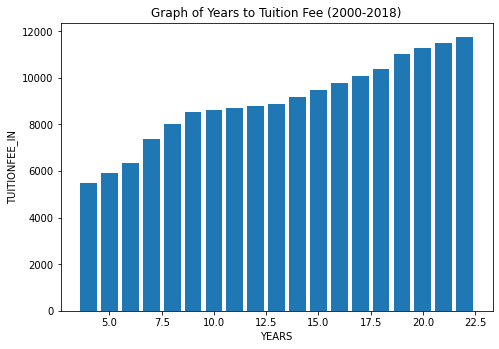

In [43]:
# <9>

x = umbc_df['YEAR']
y = umbc_df['TUITIONFEE_IN']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x,y)
plt.xscale('linear')

ax.set_title("Graph of Years to Tuition Fee (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("TUITIONFEE_IN", color='black')

plt.show()

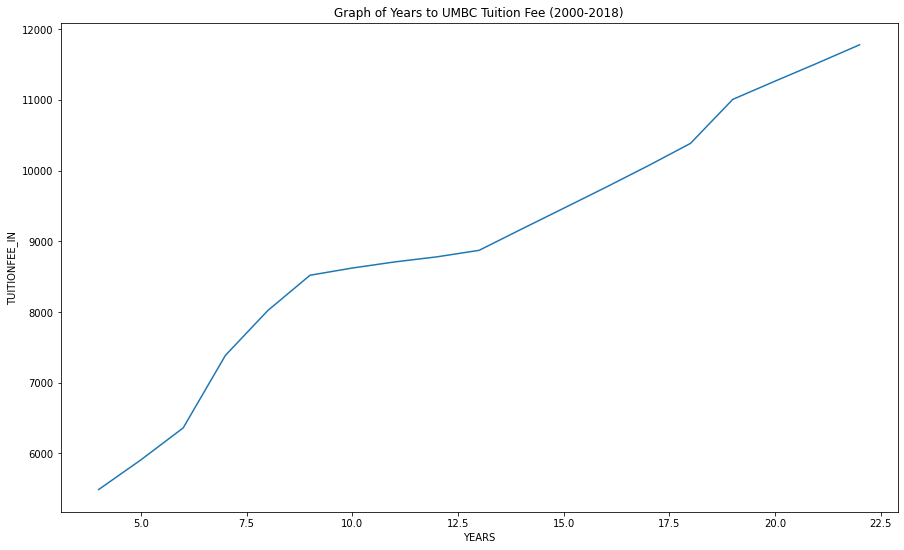

In [44]:
# <10>

x = umbc_df['YEAR']
y = umbc_df['TUITIONFEE_IN']

fig, ax = plt.subplots(figsize = (15,9))

ax.plot(x,y)
plt.xscale('linear')

ax.set_title("Graph of Years to UMBC Tuition Fee (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("TUITIONFEE_IN", color='black')

fig.show()

In [45]:
# <11>

tuition_list = umbc_df['TUITIONFEE_IN'].to_list()
print(tuition_list)

[nan, nan, nan, nan, 5490.0, 5910.0, 6362.0, 7388.0, 8020.0, 8520.0, 8622.0, 8708.0, 8780.0, 8872.0, 9171.0, 9467.0, 9764.0, 10068.0, 10384.0, 11006.0, 11264.0, 11518.0, 11778.0]


In [46]:
# Loop through the list and calculate the % change each year over the prior year
umbc_percent_list = []

for tuit in tuition_list:
    try:
          pct_increase = ((tuit - last_year_tuition) / last_year_tuition) * 100
    except:
          pct_increase = 0

    umbc_percent_list.append(pct_increase)
    last_year_tuition = tuit

    print(last_year_tuition, end = " ")

print(f"\n {umbc_percent_list}")

nan nan nan nan 5490.0 5910.0 6362.0 7388.0 8020.0 8520.0 8622.0 8708.0 8780.0 8872.0 9171.0 9467.0 9764.0 10068.0 10384.0 11006.0 11264.0 11518.0 11778.0 
 [0, nan, nan, nan, nan, 7.650273224043716, 7.648054145516074, 16.12700408676517, 8.554412560909583, 6.234413965087282, 1.1971830985915493, 0.9974483878450475, 0.8268259072117593, 1.0478359908883828, 3.370153291253381, 3.227565151019518, 3.1372134783986483, 3.11347808275297, 3.1386571315057608, 5.989984591679507, 2.344175904052335, 2.254971590909091, 2.2573363431151243]


In [48]:
# Round up the percentage to two decimal points

umbc_percent_list_rd = [round(cost, 2) for cost in umbc_percent_list]

In [49]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")

umbc_df.insert(7, "PCT_CHANGE", umbc_percent_list_rd)

In [50]:
print(umbc_df)

      UNITID                                   INSTNM  ...  YEAR  PCT_CHANGE
2151  163268  University of Maryland-Baltimore County  ...  1996        0.00
2049  163268  University of Maryland-Baltimore County  ...  1997         NaN
1982  163268  University of Maryland-Baltimore County  ...  1998         NaN
1955  163268  University of Maryland-Baltimore County  ...  1999         NaN
1926  163268  University of Maryland-Baltimore County  ...  2000         NaN
1915  163268  University of Maryland-Baltimore County  ...  2001        7.65
1893  163268  University of Maryland-Baltimore County  ...  2002        7.65
1873  163268  University of Maryland-Baltimore County  ...  2003       16.13
1830  163268  University of Maryland-Baltimore County  ...  2004        8.55
1819  163268  University of Maryland-Baltimore County  ...  2005        6.23
1799  163268  University of Maryland-Baltimore County  ...  2006        1.20
1779  163268  University of Maryland-Baltimore County  ...  2007        1.00

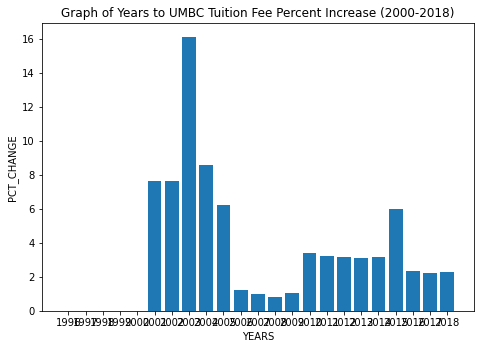

In [58]:
# Plot tuition growth rate year over year - bar chart

x = umbc_df['YEAR']
y = umbc_df['PCT_CHANGE']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x,y)
ax.set_title("Graph of Years to UMBC Tuition Fee Percent Increase (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("PCT_CHANGE", color='black')

plt.show()

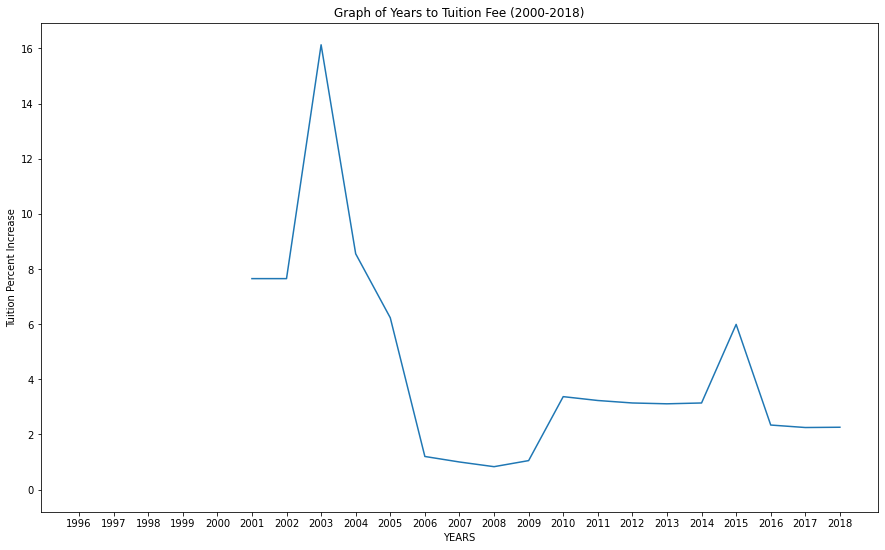

In [59]:
# Plot tuition growth rate year over year - Line chart

x = umbc_df['YEAR']
y = umbc_df['PCT_CHANGE']

fig, ax = plt.subplots(figsize = (15,9))

ax.plot(x,y)

ax.set_title("Graph of Years to Tuition Fee (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("Tuition Percent Increase", color='black')

fig.show()

In [60]:
# <12>

def percent_change(tuition_list):
    percent_list = []

    for year in tuition_list:
        try:
              pct_increase = ((year - last_year_tuition) / last_year_tuition) * 100
        except:
              pct_increase = 0

        percent_list.append(round(pct_increase,2))
        last_year_tuition = year

    return percent_list

In [61]:
#Testing the function
percent_change([0,1,2,4,8,16])

[0, 0, 100.0, 100.0, 100.0, 100.0]

In [62]:
percent_change([0,16,8,4,2,1,.5,.25])

[0, 0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0]

In [64]:
# <13>

def college_finder(dataframe, column, name):
    find_it = dataframe[dataframe[column].str.contains(name)]
    return find_it

jhu_df = college_finder(full_df, "INSTNM", "Johns Hopkins")
jhu_df = jhu_df.sort_values(by="YEAR")

In [65]:
jhu_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


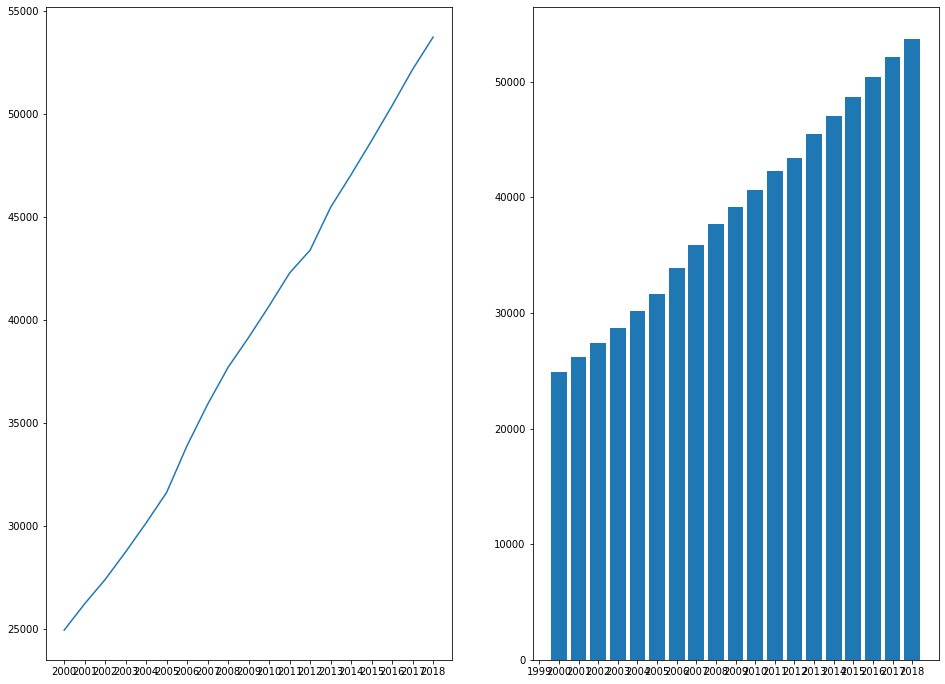

In [67]:
# <14> 

x1 = jhu_df['YEAR']
y1 = jhu_df['TUITIONFEE_IN']

fig, ax = plt.subplots(figsize = (16,12))
ax.set_title("Graph of Years to Pct Increase in Tuition (2000-2018)", color='black')

plt.subplot(1, 2, 1)
plt.plot(x1, y1)

x2 = jhu_df['YEAR']
y2 = jhu_df['TUITIONFEE_IN']

plt.subplot(1, 2, 2)
plt.bar(x2, y2)

plt.show()

In [69]:
# <15>

jhu_tuition_list = jhu_df['TUITIONFEE_IN'].to_list()
jhu_percent_chg = percent_change(jhu_tuition_list)


jhu_df.shape

(23, 7)

In [72]:
# <16>

jhu_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,0.00
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,5.13
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,4.50
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,4.89
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,4.91
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,4.91


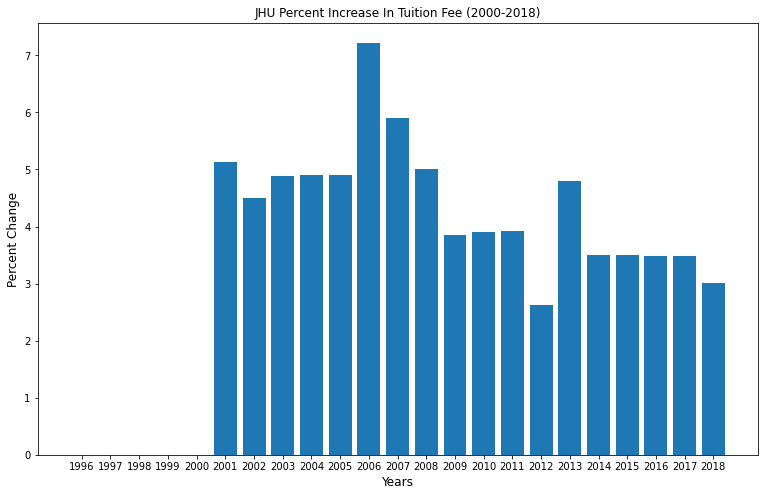

<Figure size 432x288 with 0 Axes>

In [75]:
# <17>

x = jhu_df['YEAR']
y = jhu_df['PCT_CHANGE']

fig, ax = plt.subplots(figsize = (10,6))

#As figure plot
ax = plt.figure()
ax = fig.add_axes([0,0,1,1])

#As bar graph
ax.bar(x,y)
ax.set_title("JHU Percent Increase In Tuition Fee (2000-2018)", 
             color='black', 
             size = 12)
ax.set_xlabel("Years", color='black', size = 12)
ax.set_ylabel("Percent Change", color='black', size = 12)

plt.show()

In [78]:
# <18>

umbc2_df = umbc_df[["YEAR", "PCT_CHANGE"]]
umbc2_df = umbc2_df.rename(columns={"PCT_CHANGE": "UMBC_PCT"})

In [80]:
jhu2_df = jhu_df[["YEAR", "PCT_CHANGE"]]
jhu2_df = jhu2_df.rename(columns={"PCT_CHANGE": "JHU_PCT"})

In [81]:
umbc_jhu_df = pd.concat([umbc2_df, jhu2_df], )
print(umbc_jhu_df)
umbc_jhu_df.shape

      YEAR  UMBC_PCT  JHU_PCT
2151  1996      0.00      NaN
2049  1997       NaN      NaN
1982  1998       NaN      NaN
1955  1999       NaN      NaN
1926  2000       NaN      NaN
1915  2001      7.65      NaN
1893  2002      7.65      NaN
1873  2003     16.13      NaN
1830  2004      8.55      NaN
1819  2005      6.23      NaN
1799  2006      1.20      NaN
1779  2007      1.00      NaN
1767  2008      0.83      NaN
1745  2009      1.05      NaN
1710  2010      3.37      NaN
1694  2011      3.23      NaN
1660  2012      3.14      NaN
1629  2013      3.11      NaN
1610  2014      3.14      NaN
1555  2015      5.99      NaN
1510  2016      2.34      NaN
1478  2017      2.25      NaN
1415  2018      2.26      NaN
2139  1996       NaN     0.00
2039  1997       NaN      NaN
1973  1998       NaN      NaN
1946  1999       NaN      NaN
1917  2000       NaN      NaN
1906  2001       NaN     5.13
1884  2002       NaN     4.50
1865  2003       NaN     4.89
1823  2004       NaN     4.91
1812  2005

(46, 3)

In [83]:
umbc_jhu_df = pd.merge(jhu2_df, umbc2_df, on='YEAR')
umbc_jhu_df.head(10)

,YEAR,JHU_PCT,UMBC_PCT
0,1996,0.00,0.00
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,5.13,7.65
6,2002,4.50,7.65
7,2003,4.89,16.13
8,2004,4.91,8.55
9,2005,4.91,6.23


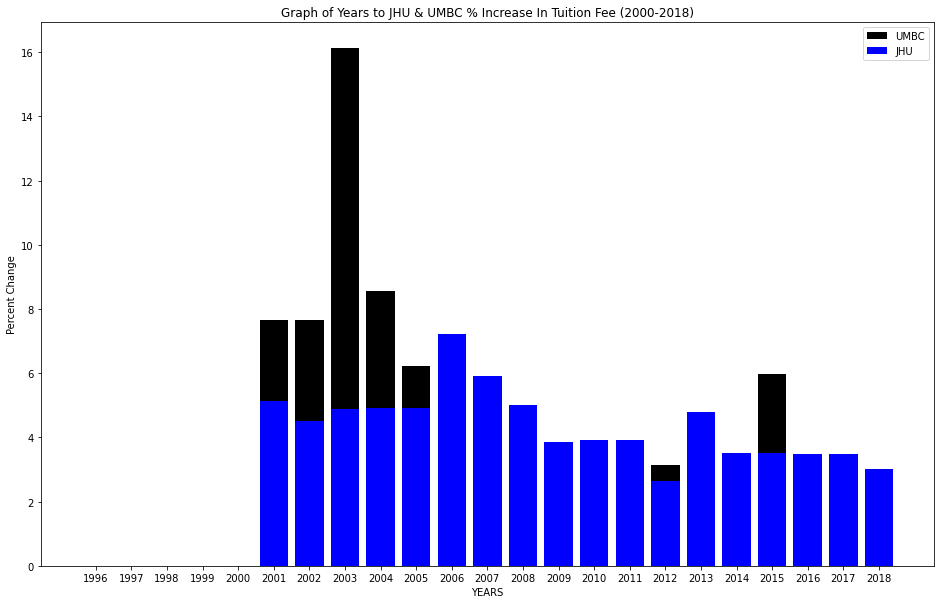

In [89]:
# Plot UMBC and JHU separately on the same plot 
x1 = umbc_jhu_df['YEAR']
y1 = umbc_jhu_df['UMBC_PCT']

#JHU Plot
x2 = umbc_jhu_df['YEAR']
y2 = umbc_jhu_df['JHU_PCT']

fig, ax = plt.subplots(figsize = (16,10))

ax.bar(x1,y1, color = 'black', label = 'UMBC')
ax.bar(x2, y2, color = 'blue', label = 'JHU')

plt.legend(loc="upper right")

ax.set_title("Graph of Years to JHU & UMBC % Increase In Tuition Fee (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("Percent Change", color='black')

plt.show()

TypeError: ignored

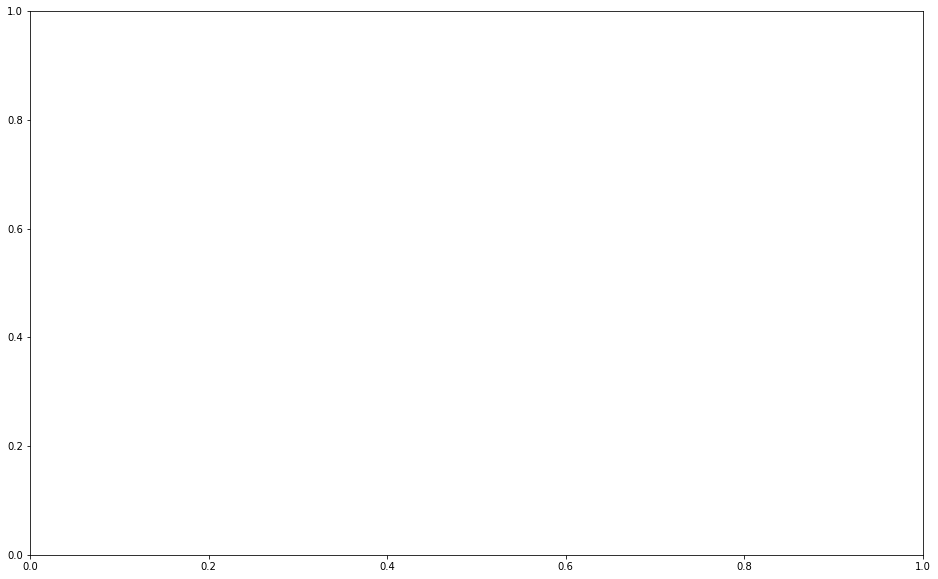

In [126]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#UMBC Plot
x1 = umbc_jhu_df['YEAR']
y1 = umbc_jhu_df['UMBC_PCT']

#JHU Plot
x2 = umbc_jhu_df['YEAR']
y2 = umbc_jhu_df['JHU_PCT']

fig, ax = plt.subplots(figsize = (16,10))

ax.bar(x1-.15,y1, width=0.2, color = 'gold', label = 'UMBC')
ax.bar(x2+.15,y2, width=0.2, color = 'blue', label = 'JHU')

plt.legend(loc="upper right")
ax.set_title("Graph of Years to JHU & UMBC % Increase In Tuition Fee (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("Percent Change", color='black')

plt.show()

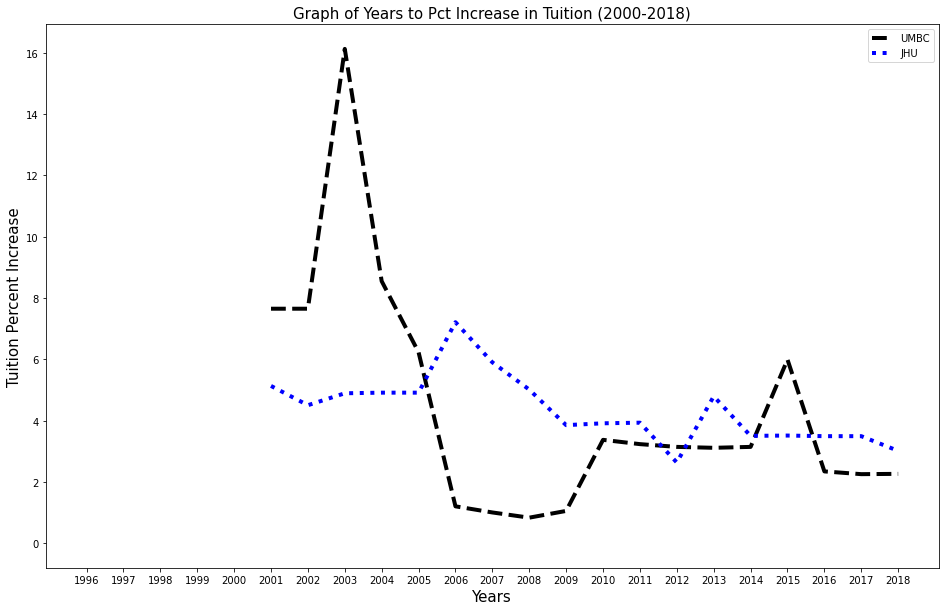

In [104]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#UMBC Plot
x1 = umbc_jhu_df['YEAR']
y1 = umbc_jhu_df['UMBC_PCT']

#JHU Plot
x2 = umbc_jhu_df['YEAR']
y2 = umbc_jhu_df['JHU_PCT']

#Set Figure Size 
fig, ax = plt.subplots(figsize = (16,10))

#Plot the Two lines
ax.plot(x1,y1, color='black', linestyle='dashed', linewidth=4, label = 'UMBC')
ax.plot(x2,y2, color='blue', linestyle='dotted', linewidth=4, label ='JHU')

#Include the legend
plt.legend(loc="upper right")
ax.set_title("Graph of Years to Pct Increase in Tuition (2000-2018)", color='black', size = 15)
ax.set_xlabel("Years", color='black', size = 15)
ax.set_ylabel("Tuition Percent Increase", color='black', size = 15)

fig.show()

### Observation/ Conclusion

**UMBC**

UMBC's tuition increased from 1% to 16% from 2000-2015. From 2003-2004 UMBC had a great increase in tuition (16%).

However, it declined greatly in the following years (1-2%). After 2005, it has remained steady. Results show greater variance with the UMBC tuition increases than the JHU increases. For UMBC Students, the tuition increases have now somewhat stabilized and decreased since the spike in 2004.

**JHU**

JHU's tuition increases have stayed between 3-8% annually. The percentage increases in tuition are steady, and have declined slightly from 2000 to today.